In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from scipy.cluster.vq import whiten, kmeans, kmeans2

In [4]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': '77df605936cb498fad65ebd44ab77a8d' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [5]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/439/teams', 'teams')

In [6]:
for team in teams:
    players = call_api(team['_links']['players']['href'], 'players')
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    goals = 0
    loses = 0
    MarketValue = team['squadMarketValue']
    for f in fixtures:
        if team['name'] == f['homeTeamName']:
            goals += f['result']['goalsHomeTeam'] if f['result']['goalsHomeTeam'] else 0
        else:
            goals += f['result']['goalsAwayTeam'] if f['result']['goalsAwayTeam'] else 0
    for f in fixtures:
        if (f['result']["goalsHomeTeam"] != None) & (f['result']['goalsAwayTeam'] != None):
            if (team['name'] == f['homeTeamName']) & (f['result']["goalsHomeTeam"] < f['result']['goalsAwayTeam']):
                loses += 1
            elif (team['name'] == f['awayTeamName']) & (f['result']["goalsHomeTeam"] > f['result']['goalsAwayTeam']):
                loses +=1
    team['players'] = players
    team['goals'] = goals
    team['MarketValue'] = round(np.random.normal(200000, 75000), 2)
    team['loses'] = loses
    print('Team "{}", {} players, {} goals, {} loses, {} $'.format(team['name'], len(team['players']), team['goals'], 
                                                                   team['loses'], team['MarketValue']))

Team "FC Rio Ave", 23 players, 35 goals, 12 loses, 40617.92 $
Team "FC Porto", 26 players, 87 goals, 5 loses, 177447.48 $
Team "Moreirense FC", 25 players, 26 goals, 15 loses, 178879.88 $
Team "FC Paços de Ferreira", 31 players, 30 goals, 15 loses, 188626.47 $
Team "Sporting CP", 27 players, 63 goals, 6 loses, 211564.07 $
Team "Maritimo Funchal", 28 players, 32 goals, 10 loses, 310677.25 $
Team "CD Tondela", 26 players, 33 goals, 14 loses, 95005.52 $
Team "SL Benfica", 24 players, 76 goals, 7 loses, 229454.09 $
Team "Boavista Porto FC", 29 players, 29 goals, 14 loses, 270326.49 $
Team "FC Arouca", 21 players, 0 goals, 0 loses, 311976.46 $
Team "Vitoria Setubal", 28 players, 35 goals, 13 loses, 227594.98 $
Team "C.F. Os Belenenses", 25 players, 26 goals, 12 loses, 53756.93 $
Team "Vitoria Guimaraes", 30 players, 38 goals, 15 loses, 129739.12 $
Team "Sporting Braga", 24 players, 65 goals, 6 loses, 167260.63 $
Team "GD Estoril Praia", 29 players, 25 goals, 18 loses, 84924.61 $
Team "Feire

In [7]:
team_for_pd = []
for team in teams:
    if team['players']:
        team_for_pd.append({'name': team['name'], 'players': len(team['players']), 'goals': team['goals'], 
                            'marketValue': team['MarketValue'], 'loses': team['loses']})
team_for_pd

[{'goals': 35,
  'loses': 12,
  'marketValue': 40617.92,
  'name': 'FC Rio Ave',
  'players': 23},
 {'goals': 87,
  'loses': 5,
  'marketValue': 177447.48,
  'name': 'FC Porto',
  'players': 26},
 {'goals': 26,
  'loses': 15,
  'marketValue': 178879.88,
  'name': 'Moreirense FC',
  'players': 25},
 {'goals': 30,
  'loses': 15,
  'marketValue': 188626.47,
  'name': 'FC Paços de Ferreira',
  'players': 31},
 {'goals': 63,
  'loses': 6,
  'marketValue': 211564.07,
  'name': 'Sporting CP',
  'players': 27},
 {'goals': 32,
  'loses': 10,
  'marketValue': 310677.25,
  'name': 'Maritimo Funchal',
  'players': 28},
 {'goals': 33,
  'loses': 14,
  'marketValue': 95005.52,
  'name': 'CD Tondela',
  'players': 26},
 {'goals': 76,
  'loses': 7,
  'marketValue': 229454.09,
  'name': 'SL Benfica',
  'players': 24},
 {'goals': 29,
  'loses': 14,
  'marketValue': 270326.49,
  'name': 'Boavista Porto FC',
  'players': 29},
 {'goals': 0,
  'loses': 0,
  'marketValue': 311976.46,
  'name': 'FC Arouca',
 

In [8]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd.head(10)

,goals,loses,marketValue,name,players
0,35,12,40617.92,FC Rio Ave,23
1,87,5,177447.48,FC Porto,26
2,26,15,178879.88,Moreirense FC,25
3,30,15,188626.47,FC Paços de Ferreira,31
4,63,6,211564.07,Sporting CP,27
5,32,10,310677.25,Maritimo Funchal,28
6,33,14,95005.52,CD Tondela,26
7,76,7,229454.09,SL Benfica,24
8,29,14,270326.49,Boavista Porto FC,29
9,0,0,311976.46,FC Arouca,21


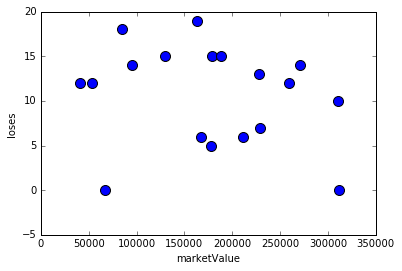

In [9]:
teams_pd.plot.scatter(x='marketValue', y='loses', s=100)

In [10]:
del teams_pd['name'], teams_pd['players'], teams_pd['goals']
teams_pd

,loses,marketValue
0,12,40617.92
1,5,177447.48
2,15,178879.88
3,15,188626.47
4,6,211564.07
5,10,310677.25
6,14,95005.52
7,7,229454.09
8,14,270326.49
9,0,311976.46


In [11]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[ 2.2122742 ,  0.49370889],
       [ 0.92178092,  2.15686568],
       [ 2.76534275,  2.17427643],
       [ 2.76534275,  2.29274577],
       [ 1.1061371 ,  2.57155121],
       [ 1.84356183,  3.7762672 ],
       [ 2.58098657,  1.15478758],
       [ 1.29049328,  2.78900355],
       [ 2.58098657,  3.28580563],
       [ 0.        ,  3.79205903],
       [ 2.39663038,  2.76640616],
       [ 2.2122742 ,  0.65341293],
       [ 2.76534275,  1.57697283],
       [ 1.1061371 ,  2.033045  ],
       [ 3.3184113 ,  1.0322546 ],
       [ 3.50276748,  1.98000456],
       [ 0.        ,  0.81240165],
       [ 2.2122742 ,  3.15062943]])

In [12]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[ 0.        ,  0.81240165],
        [ 1.49533349,  2.92462588],
        [ 2.76534275,  1.41977045]]),
 array([2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1]))

In [13]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]

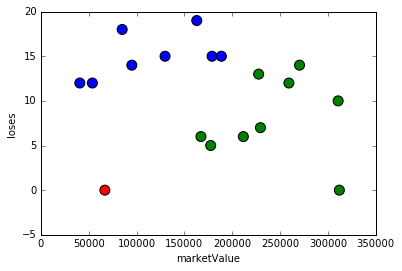

In [14]:
teams_pd.plot.scatter(x='marketValue', y='loses', c=colors, s=100)

In [15]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

(array([[ 0.        ,  3.79205903],
        [ 2.6178578 ,  0.98222736],
        [ 2.2122742 ,  3.40423409],
        [ 2.85752084,  2.30335823],
        [ 0.88490968,  2.07257342]]),
 array([1, 4, 3, 3, 4, 2, 1, 4, 2, 0, 3, 1, 1, 4, 1, 3, 4, 2]))

In [16]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]

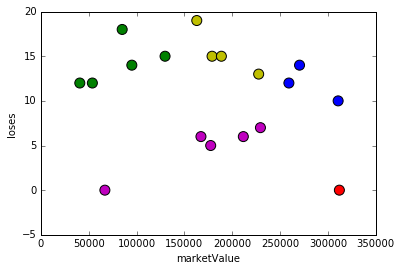

In [17]:
teams_pd.plot.scatter(x='marketValue', y='loses', c=colors, s=100)